# Especialidad en Estadistica Aplicada
## Data Mining
### Nombre: Mateo Orozco Baldovino
### Fecha: 25 de Enero de 2026
La informacion de este cuaderno puede ser encontrado en el repositorio de GitHub:
https://github.com/TheMaorba/DataMining/tree/main/Tarea5

# Caracteristicas de la base de datos

# Importando librerias y base de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:

 #Importando la base de datos
df = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")

In [3]:
# Imprimiendo tipos de datos y separando las variables numericas
df.info()
columnas_numericas = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
# Tambien se puede usar columnas_numericas = df.select_dtypes(include=['float64', 'int64'])
# Eliminar columnas no numericas
df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,no
1,44,29,5,151,1,-1,0,no
2,33,2,5,76,1,-1,0,no
3,47,1506,5,92,1,-1,0,no
4,33,1,5,198,1,-1,0,no


# PCA (Analisis de componentes principales)

In [5]:
# Estandarizar los datos
datos_escalados = StandardScaler().fit_transform(columnas_numericas)
# Crear un DataFrame con los datos estandarizados
df_estandar = pd.DataFrame(datos_escalados, columns=columnas_numericas.columns)

In [6]:
df_estandar.head(5)

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


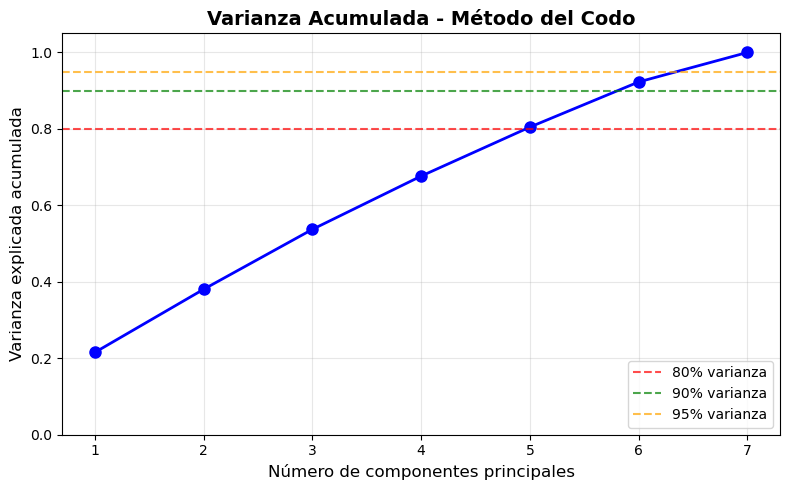

Varianza explicada por componente:
PC1: 0.2156 (21.56%)
PC2: 0.1650 (16.50%)
PC3: 0.1567 (15.67%)
PC4: 0.1393 (13.93%)
PC5: 0.1282 (12.82%)
PC6: 0.1180 (11.80%)
PC7: 0.0772 (7.72%)


In [7]:
# Método del codo para PCA
pca = PCA().fit(datos_escalados)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), 
         varianza_acumulada, 
         'bo-', 
         linewidth=2, 
         markersize=8)

# Líneas de referencia
plt.axhline(y=0.80, color='red', linestyle='--', label='80% varianza', alpha=0.7)
plt.axhline(y=0.90, color='green', linestyle='--', label='90% varianza', alpha=0.7)
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% varianza', alpha=0.7)

plt.xlabel('Número de componentes principales', fontsize=12)
plt.ylabel('Varianza explicada acumulada', fontsize=12)
plt.title('Varianza Acumulada - Método del Codo', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.ylim([0, 1.05])
plt.tight_layout()
plt.show()

# Imprimir varianza explicada por componente
print("Varianza explicada por componente:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

In [8]:
# Aplicar PCA y crea un Array con los componentes principales seleccionados
pca2 = PCA(n_components=2, random_state=42)
componentes_principales = pca2.fit_transform(datos_escalados)
# Crear un DataFrame con los resultados de PCA
df_pca2 = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])
df_pca2.head(5)

,Componente 1,Componente 2
0,0.033707,-1.402827
1,0.017589,-0.954478
2,0.022938,-0.699632
3,0.011669,-0.954774
4,0.051021,-0.912816


In [9]:
print(f"Varianza explicada por cada componente: {pca2.explained_variance_}")
print(f"Proporción de varianza explicada por cada componente: {pca2.explained_variance_ratio_}")

Varianza explicada por cada componente: [1.50932686 1.15503984]
Proporción de varianza explicada por cada componente: [0.21561335 0.16500204]
